# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=50_000 # size of the population to be simulated
size1=50_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_week'
perusresults='results/perus_results_week'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.08333333333333333
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | -0.733   |
| fps                | 2809     |
| nupdates           | 1        |
| policy_entropy     | 0.937    |
| policy_loss        | -127     |
| total_timesteps    | 0        |
| value_loss         | 1.85e+04 |
---------------------------------


-------------------------

---------------------------------
| explained_variance | -0.324   |
| fps                | 2883     |
| nupdates           | 20       |
| policy_entropy     | 0.827    |
| policy_loss        | 19.6     |
| total_timesteps    | 1235323  |
| value_loss         | 675      |
---------------------------------
---------------------------------
| explained_variance | -0.175   |
| fps                | 2880     |
| nupdates           | 30       |
| policy_entropy     | 0.847    |
| policy_loss        | 16.7     |
| total_timesteps    | 1885493  |
| value_loss         | 488      |
---------------------------------
---------------------------------
| explained_variance | 0.158    |
| fps                | 2880     |
| nupdates           | 40       |
| policy_entropy     | 0.878    |
| policy_loss        | 11.1     |
| total_timesteps    | 2535663  |
| value_loss         | 227      |
---------------------------------
---------------------------------
| explained_variance | 0.449    |
| fps         

---------------------------------
| explained_variance | 0.933    |
| fps                | 2881     |
| nupdates           | 290      |
| policy_entropy     | 1.22     |
| policy_loss        | -0.0868  |
| total_timesteps    | 18789913 |
| value_loss         | 5.12     |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 2881     |
| nupdates           | 300      |
| policy_entropy     | 1.23     |
| policy_loss        | -0.0544  |
| total_timesteps    | 19440083 |
| value_loss         | 4.66     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 2881     |
| nupdates           | 310      |
| policy_entropy     | 1.21     |
| policy_loss        | -0.033   |
| total_timesteps    | 20090253 |
| value_loss         | 4.45     |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2882     |
| nupdates           | 560      |
| policy_entropy     | 1.15     |
| policy_loss        | -0.0662  |
| total_timesteps    | 36344503 |
| value_loss         | 1.32     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2882     |
| nupdates           | 570      |
| policy_entropy     | 1.14     |
| policy_loss        | -0.0432  |
| total_timesteps    | 36994673 |
| value_loss         | 1.39     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2882     |
| nupdates           | 580      |
| policy_entropy     | 1.13     |
| policy_loss        | 0.00192  |
| total_timesteps    | 37644843 |
| value_loss         | 1.33     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

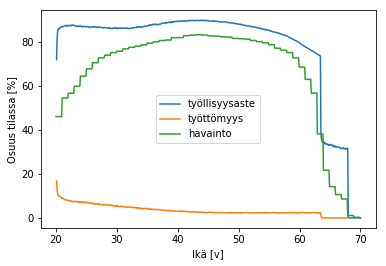

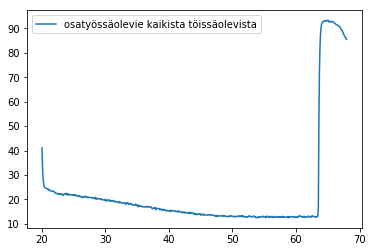

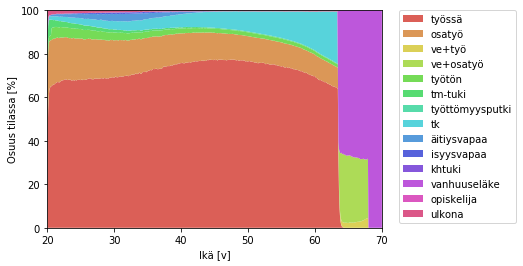

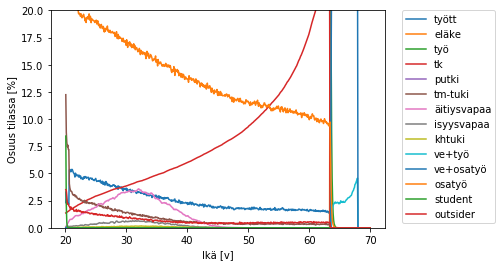

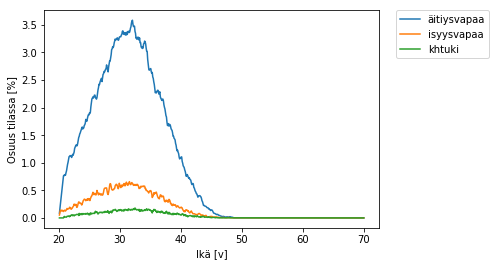

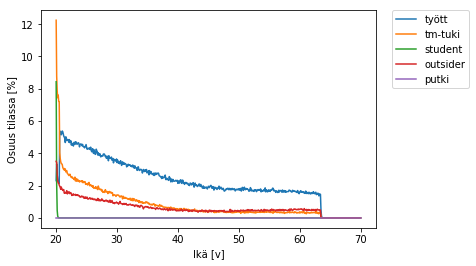

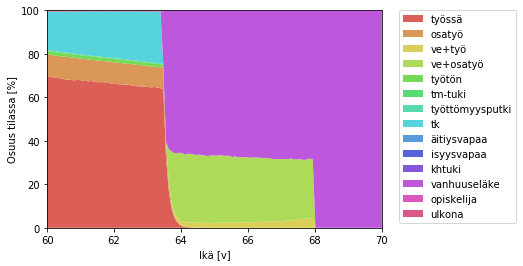

keskimääräinen työttömyysaste 3.8415384946746425


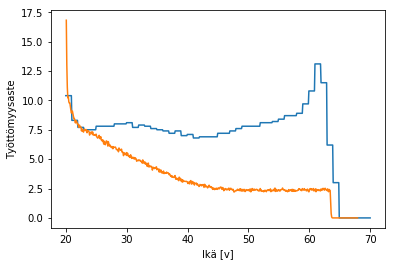

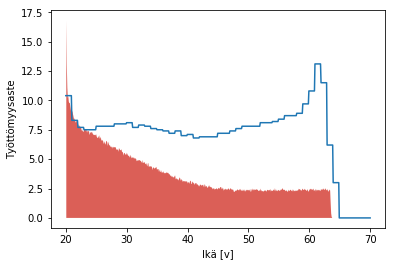

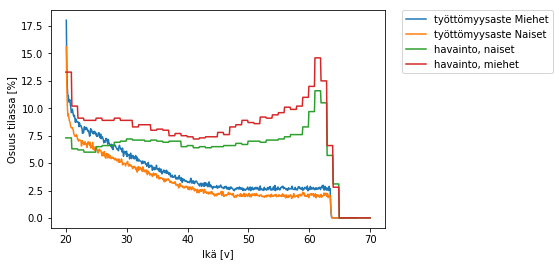

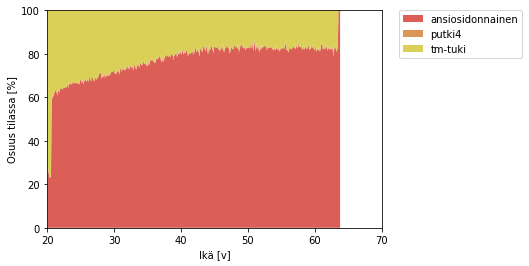

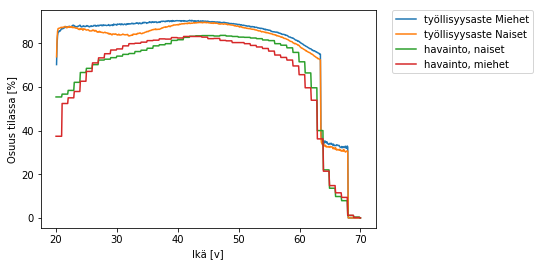

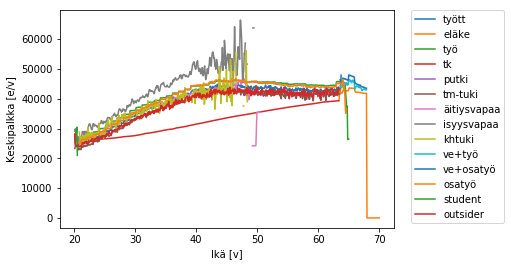

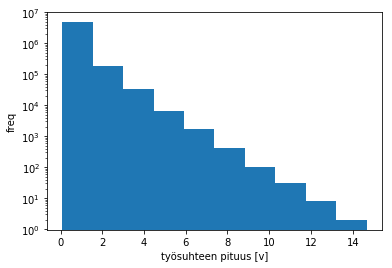

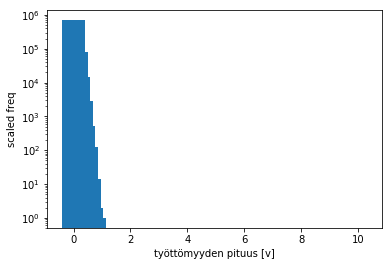

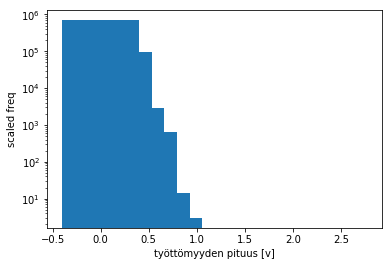

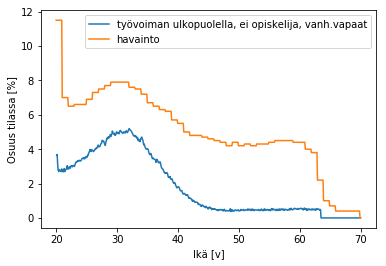

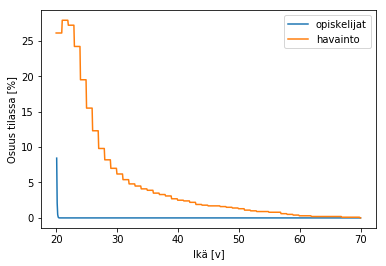

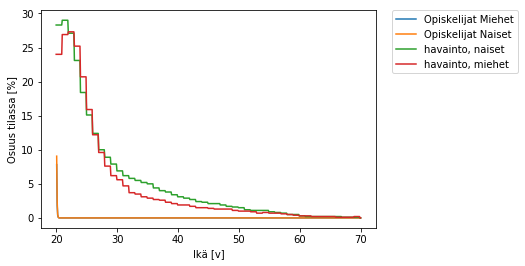

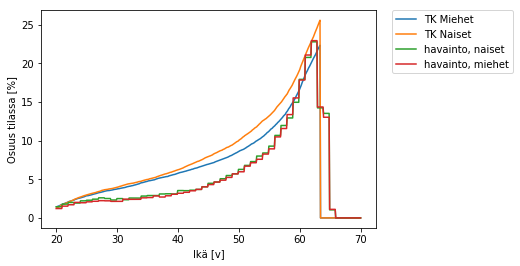

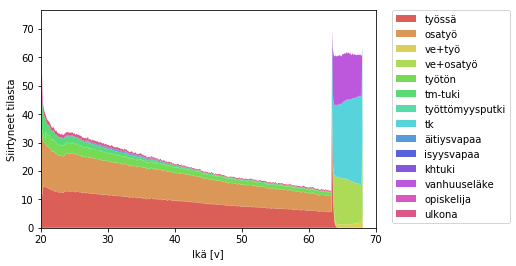

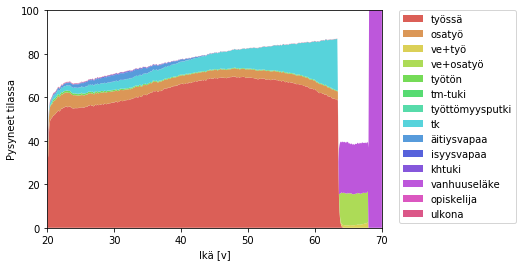

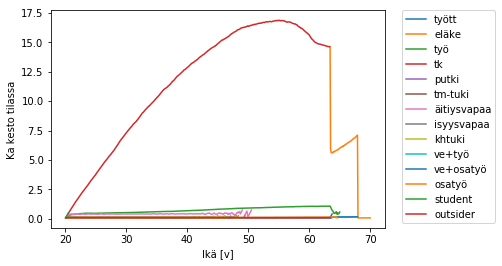

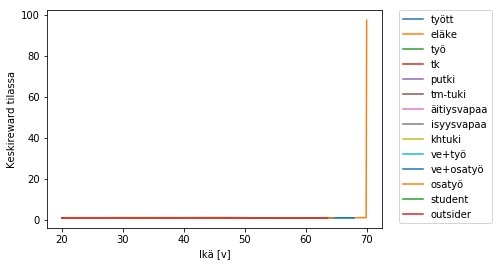

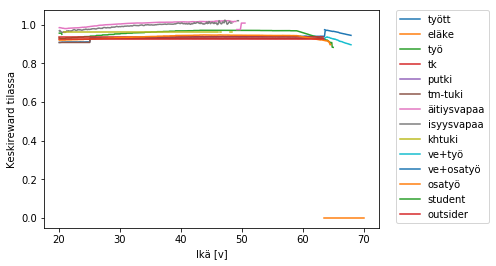

No handles with labels found to put in legend.


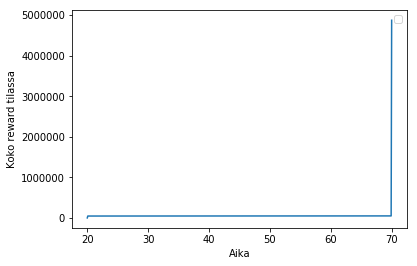

Yhteensä reward 670.98971535613


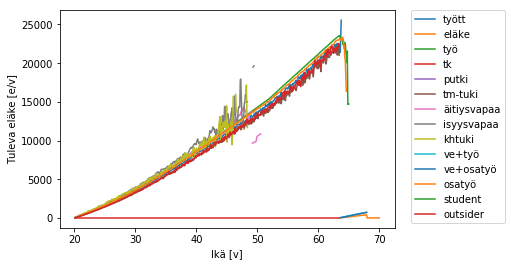

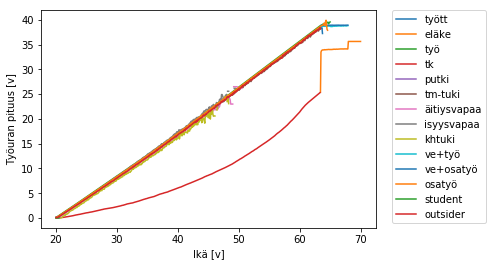

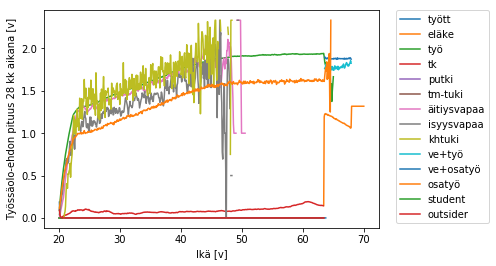

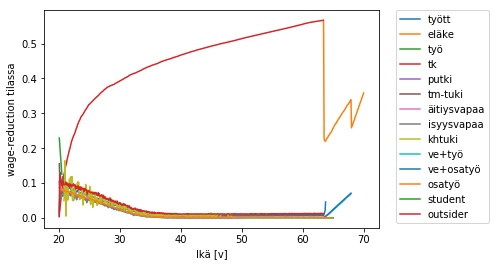

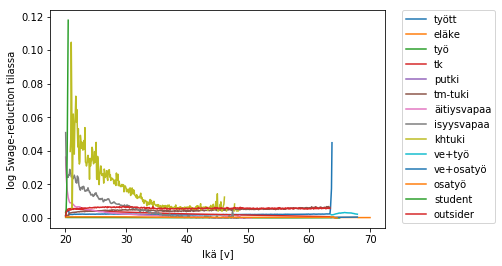

In [5]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False,timestep=1.0/12.0)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included


ValueError: x and y must have same first dimension, but have shapes (202,) and (602,)

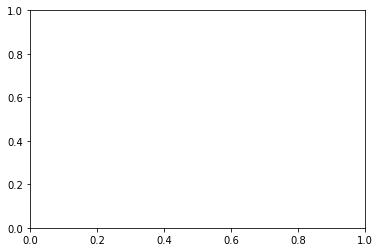

In [6]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)

In [ ]:
#cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1q.explain()
#cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
#                train=True,predict=True,batch1=1,batch2=batch2,
#                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results=perusresults+'_dqn',
#                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)

In [ ]:
x=np.linspace(0,30,40)
q=np.random.uniform(20,size=20)
h,x2=np.histogram(q,x)
print(x2,h)

In [ ]:
print(h,x2)
print(h.shape,x2.shape)

In [ ]:
q

In [ ]:
plt.bar(x[:-1],h)